<a href="https://colab.research.google.com/github/RajaChaiban/DataScience/blob/main/Predicting%20Loan%20Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.stats import pointbiserialr, chi2_contingency
import statsmodels.api as sm

# **Step 1: Preparing the Data**

In [7]:
df=pd.read_csv("credit.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [8]:
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169,4,4,67,2,1,True,False,False,...,False,True,False,True,False,True,False,False,True,False
1,48,5951,2,2,22,1,1,False,False,False,...,False,True,False,True,False,True,False,False,False,True
2,12,2096,2,3,49,1,2,False,False,True,...,False,True,False,True,False,False,False,True,False,False
3,42,7882,2,4,45,1,2,True,False,False,...,False,True,False,False,False,True,False,False,False,False
4,24,4870,3,4,53,2,2,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [9]:
data = df_new.astype(int)
data.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1


# **Data Visualizations**

Before conducting formal analysis, use visual tools to explore the data. Present graphs such as bar charts to show the proportion of loans that defaulted, scatterplots to explore relationships between default and factors like income or credit score, or histograms to display the distribution of loan amounts. Include visuals for key independent variables (e.g., interest rates, loan duration, or borrower demographics) to provide insights into how these variables relate to loan default. This step will help the audience grasp the data's structure and potential patterns.

bar charts to show the proportion of loans that defaulted

# **Distribution of Loan Amounts**


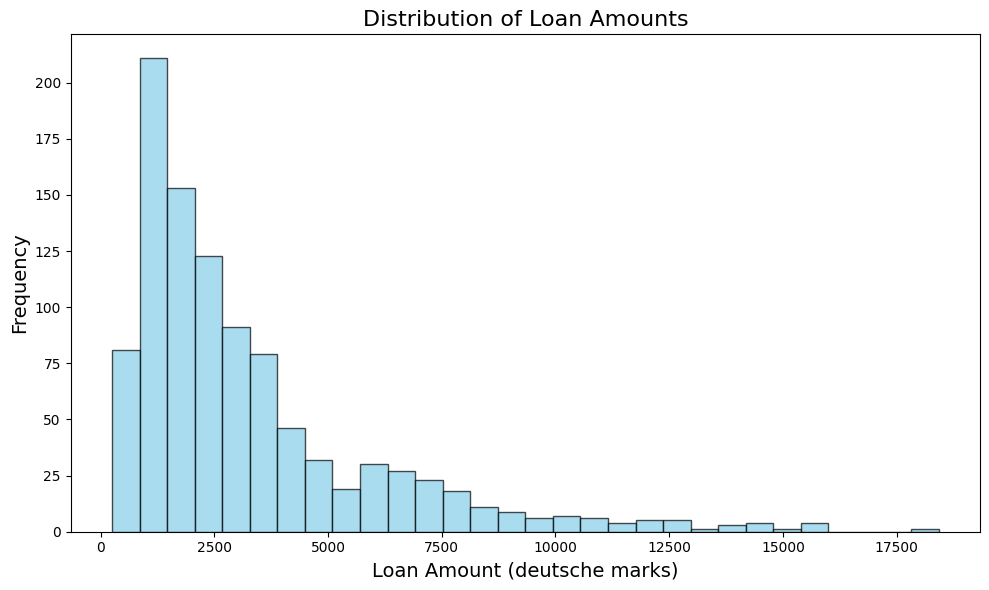

In [10]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['amount'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Loan Amounts', fontsize=16)
plt.xlabel('Loan Amount (deutsche marks)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# **Distribution of Loan Default**

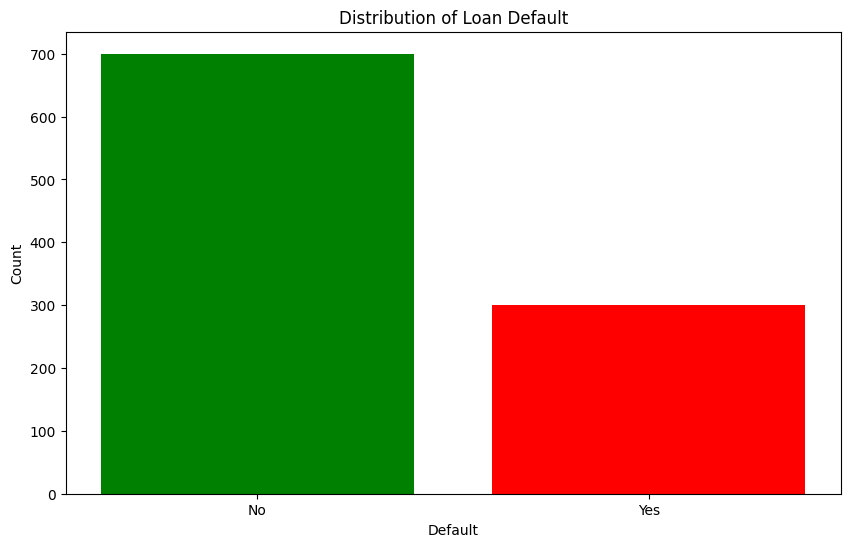

In [11]:

plt.figure(figsize=(10, 6))

# Bar plot for default_yes distribution
plt.bar(
    data['default_yes'].value_counts().index,
    data['default_yes'].value_counts().values,
    color=['green', 'red']
)

# Set custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add labels and title
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Distribution of Loan Default')

# Show the plot
plt.show()

scatterplots to explore relationships between default and factors like income or credit score

# **Loan Duration vs. Amount**

In [12]:
import seaborn as sns

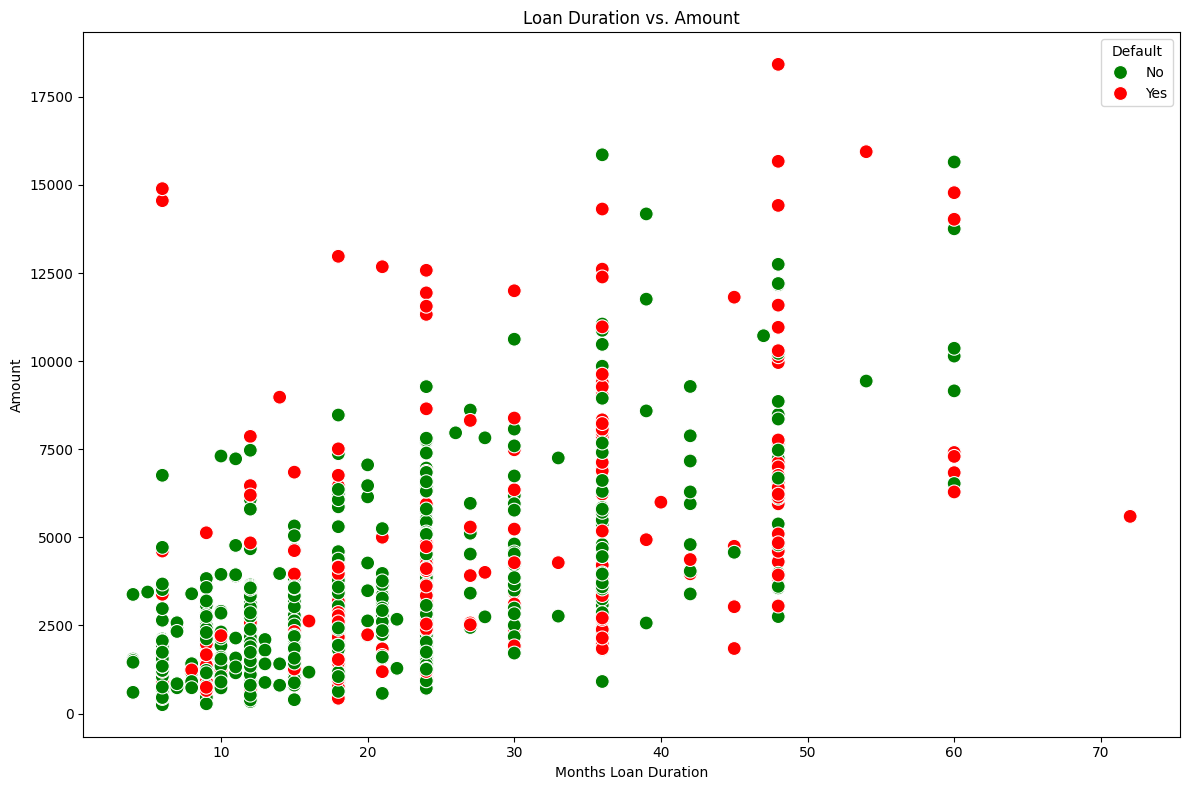

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='months_loan_duration',  # X-axis
    y='amount',                # Y-axis
    hue='default_yes',         # Color by default (Yes/No)
    palette={0: 'green', 1: 'red'},  # Colors: Green for No, Red for Yes
    s=100                      # Adjust size for better visibility
)

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['No', 'Yes']  # Correct labels for default_yes (No=0, Yes=1)
scatter.legend(handles=handles, labels=new_labels, title='Default')  # Update the legend

# Add axis labels and title
plt.xlabel('Months Loan Duration')
plt.ylabel('Amount')
plt.title('Loan Duration vs. Amount')

# Show the plot
plt.tight_layout()
plt.show()


# **Age vs. Loan Amount**

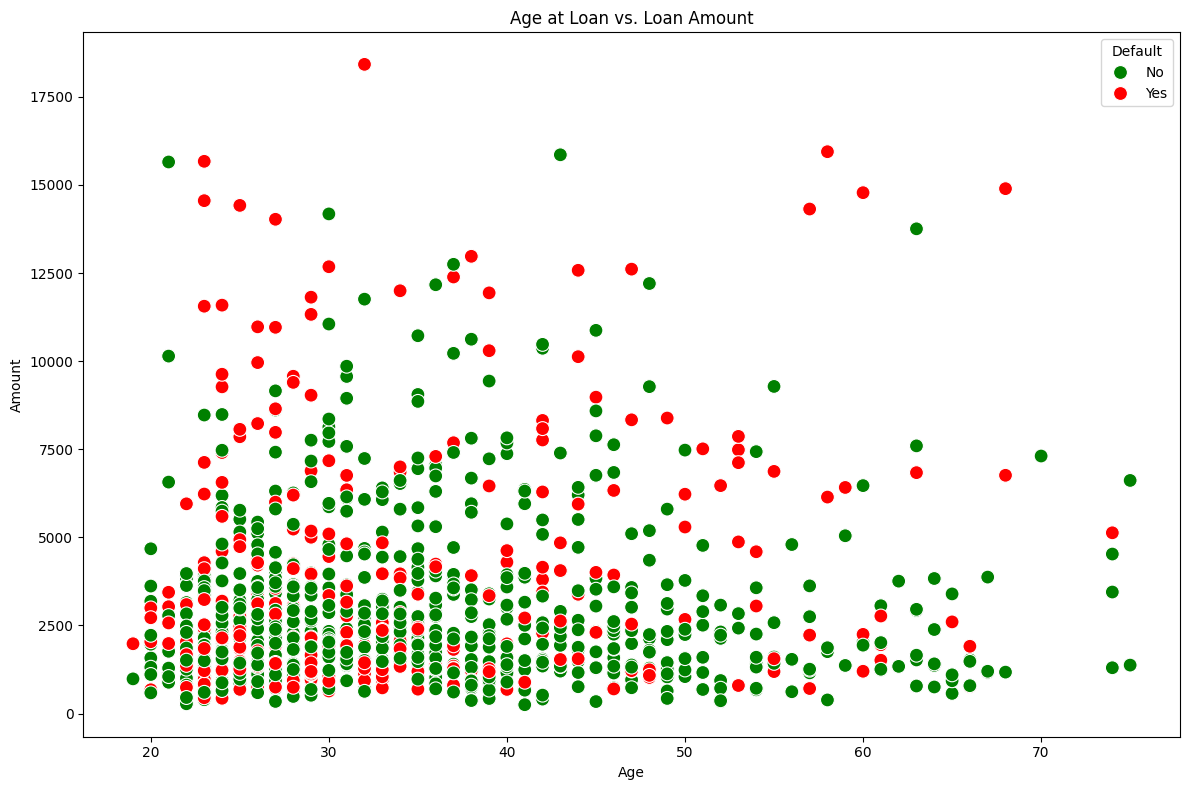

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=data,
    x='age',  # X-axis
    y='amount',                # Y-axis
    hue='default_yes',         # Color by default (Yes/No)
    palette={0: 'green', 1: 'red'},  # Colors: Green for No, Red for Yes
    s=100                      # Adjust size for better visibility
)

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['No', 'Yes']  # Correct labels for default_yes (No=0, Yes=1)
scatter.legend(handles=handles, labels=new_labels, title='Default')  # Update the legend

# Add axis labels and title
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Age at Loan vs. Loan Amount')

# Show the plot
plt.tight_layout()
plt.show()

# **Bar Graphs**

# **Default Counts by Checking & Savings Balance**

In [17]:
import pandas as pd

# Step 1: Drop numeric columns
non_numeric_data = df.select_dtypes(exclude=['int64', 'float64'])

# Define the custom order for 'savings_balance'
custom_order = ['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown']

# Apply the custom order to the 'savings_balance' column
non_numeric_data['savings_balance'] = pd.Categorical(
    non_numeric_data['savings_balance'],
    categories=custom_order,
    ordered=True
)

# Group by 'savings_balance' and 'default', then count
grouped_counts = non_numeric_data.groupby(['savings_balance', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by savings_balance:\n")
print(grouped_counts)


Counts of 'default' grouped by savings_balance:

default           no  yes
savings_balance          
< 100 DM         386  217
100 - 500 DM      69   34
500 - 1000 DM     52   11
> 1000 DM         42    6
unknown          151   32


<ipython-input-17-f8a57f6c29eb>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['savings_balance', 'default']).size().unstack(fill_value=0)


<ipython-input-18-5eacf5a72320>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['savings_balance', 'default']).size().unstack(fill_value=0)


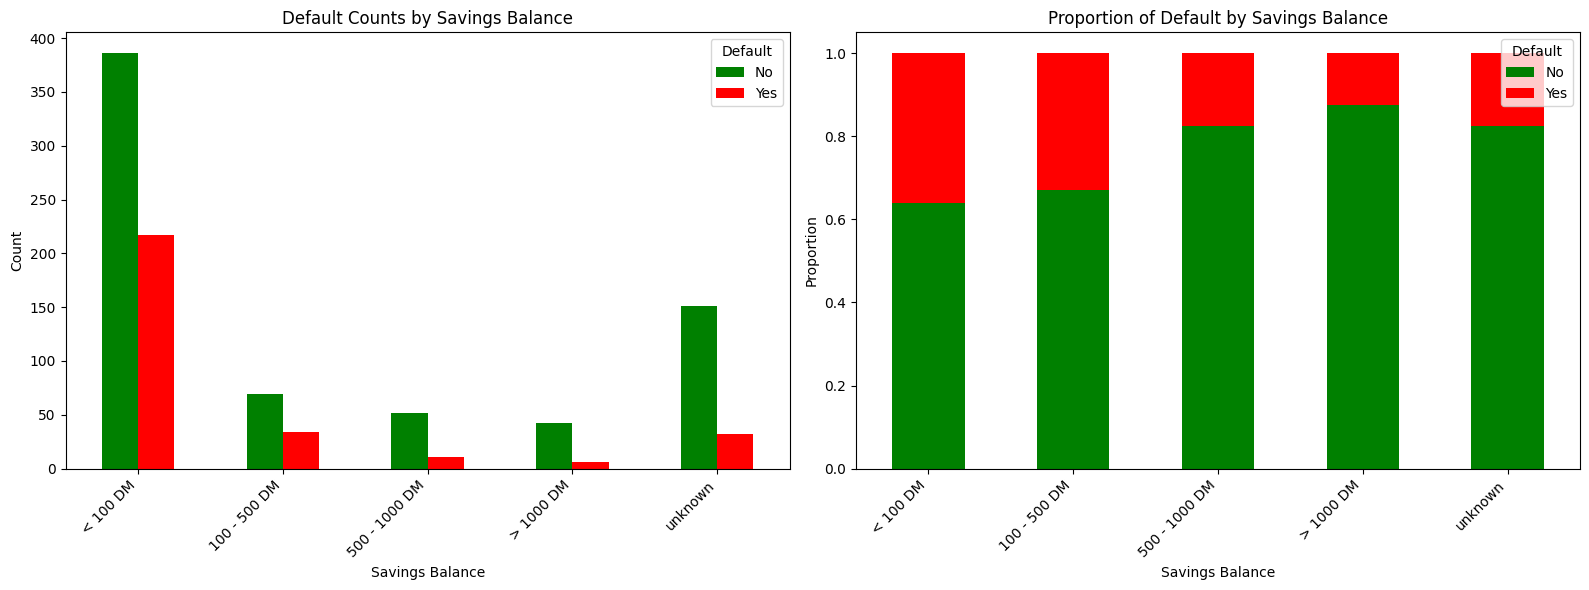

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order for 'savings_balance'
custom_order = ['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown']

# Apply the custom order to the 'savings_balance' column
non_numeric_data['savings_balance'] = pd.Categorical(
    non_numeric_data['savings_balance'],
    categories=custom_order,
    ordered=True
)

# Group by 'savings_balance' and 'default', then count
grouped_counts = non_numeric_data.groupby(['savings_balance', 'default']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Create subplots for raw counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Bar chart for raw counts
grouped_counts.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    ax=axes[0]
)
axes[0].set_title('Default Counts by Savings Balance')
axes[0].set_xlabel('Savings Balance')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Bar chart for proportions
proportions.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    ax=axes[1]
)
axes[1].set_title('Proportion of Default by Savings Balance')
axes[1].set_xlabel('Savings Balance')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
axes[1].legend(title='Default', labels=['No', 'Yes'])

# Adjust layout and display
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Step 1: Drop numeric columns
non_numeric_data = df.select_dtypes(exclude=['int64', 'float64'])

# Define the custom order for 'checking_balance'
custom_order = ['< 0 DM', '1 - 200 DM', '> 200 DM', 'unknown']

# Apply the custom order to the 'checking_balance' column
non_numeric_data['checking_balance'] = pd.Categorical(
    non_numeric_data['checking_balance'],
    categories=custom_order,
    ordered=True
)

# Group by 'checking_balance' and 'default', then count
grouped_counts = non_numeric_data.groupby(['checking_balance', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by checking_balance:\n")
print(grouped_counts)


Counts of 'default' grouped by checking_balance:

default            no  yes
checking_balance          
< 0 DM            139  135
1 - 200 DM        164  105
> 200 DM           49   14
unknown           348   46


<ipython-input-19-994d646dcacd>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['checking_balance', 'default']).size().unstack(fill_value=0)


<ipython-input-20-8dc146c93143>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby([balance_type, 'default']).size().unstack(fill_value=0)


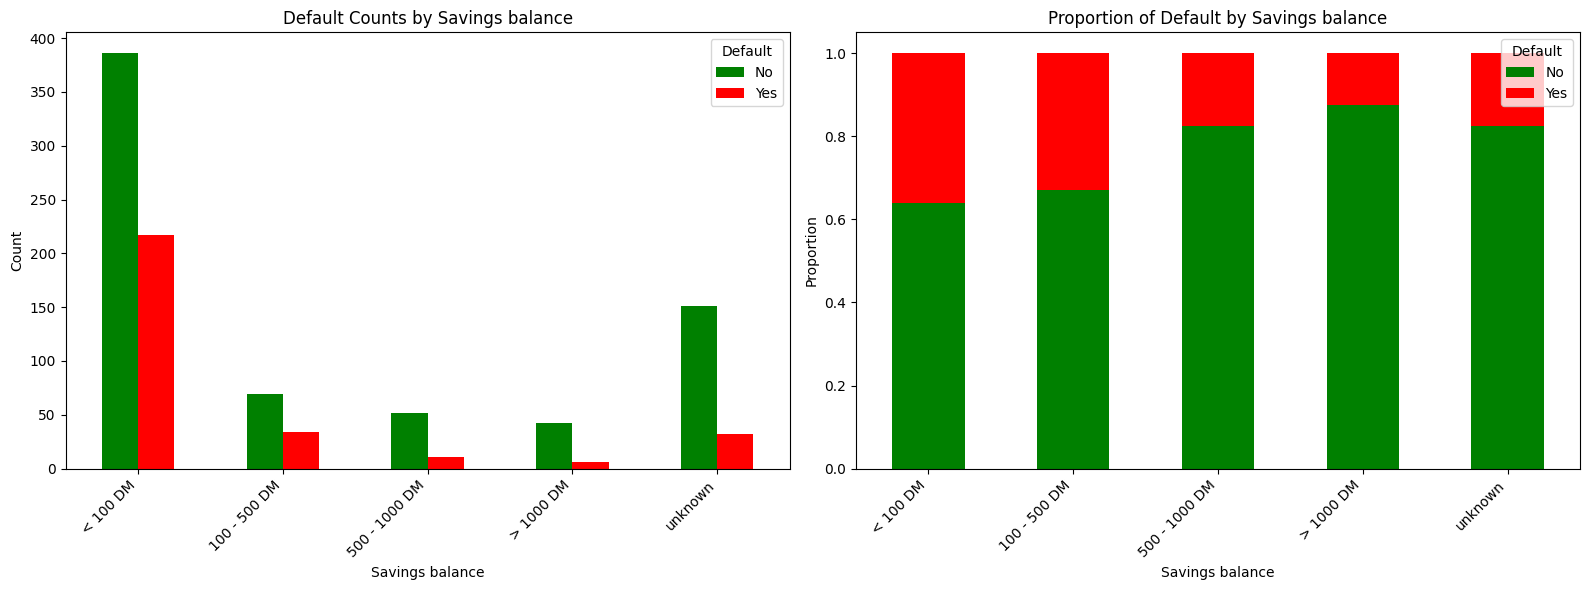

<ipython-input-20-8dc146c93143>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby([balance_type, 'default']).size().unstack(fill_value=0)


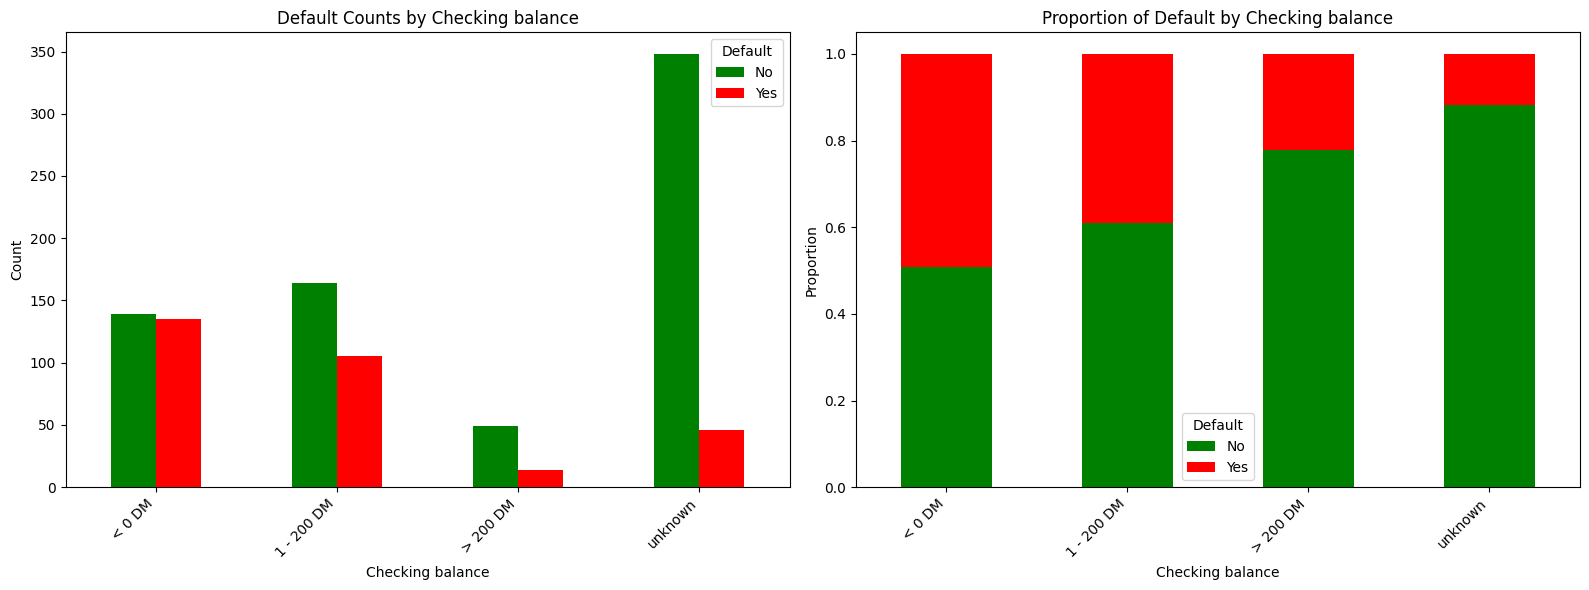

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom orders
savings_order = ['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown']
checking_order = ['< 0 DM', '1 - 200 DM', '> 200 DM', 'unknown']

# Apply the custom order to the 'savings_balance' column
non_numeric_data['savings_balance'] = pd.Categorical(
    non_numeric_data['savings_balance'],
    categories=savings_order,
    ordered=True
)

# Apply the custom order to the 'checking_balance' column
non_numeric_data['checking_balance'] = pd.Categorical(
    non_numeric_data['checking_balance'],
    categories=checking_order,
    ordered=True
)

# Create a function to generate the raw counts and proportion subplots
def plot_balance_analysis(balance_type, balance_order):
    # Group by the specified balance type and `default`, then count
    grouped_counts = non_numeric_data.groupby([balance_type, 'default']).size().unstack(fill_value=0)

    # Calculate proportions
    proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

    # Create subplots for raw counts and proportions
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # Bar chart for raw counts
    grouped_counts.plot(
        kind='bar',
        stacked=False,
        color=['green', 'red'],
        ax=axes[0]
    )
    axes[0].set_title(f'Default Counts by {balance_type.replace("_", " ").capitalize()}')
    axes[0].set_xlabel(balance_type.replace("_", " ").capitalize())
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
    axes[0].legend(title='Default', labels=['No', 'Yes'])

    # Bar chart for proportions
    proportions.plot(
        kind='bar',
        stacked=True,
        color=['green', 'red'],
        ax=axes[1]
    )
    axes[1].set_title(f'Proportion of Default by {balance_type.replace("_", " ").capitalize()}')
    axes[1].set_xlabel(balance_type.replace("_", " ").capitalize())
    axes[1].set_ylabel('Proportion')
    axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
    axes[1].legend(title='Default', labels=['No', 'Yes'])

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Plot analysis for savings_balance
plot_balance_analysis('savings_balance', savings_order)

# Plot analysis for checking_balance
plot_balance_analysis('checking_balance', checking_order)


In [21]:
#Categorical data
# Step 1: Drop numeric columns
non_numeric_data = df.select_dtypes(exclude=['int64', 'float64'])

# Step 2: Group by each categorical column and count `default` values
for col in non_numeric_data.columns:
    if col != 'default':  # Skip the target column
        print(f"\nCounts of 'default' grouped by {col}:\n")

        # Group by the column and default, then count
        grouped_counts = non_numeric_data.groupby([col, 'default']).size().unstack(fill_value=0)

        # Display the counts
        print(grouped_counts)




Counts of 'default' grouped by checking_balance:

default            no  yes
checking_balance          
1 - 200 DM        164  105
< 0 DM            139  135
> 200 DM           49   14
unknown           348   46

Counts of 'default' grouped by credit_history:

default          no  yes
credit_history          
critical        243   50
good            361  169
perfect          15   25
poor             60   28
very good        21   28

Counts of 'default' grouped by purpose:

default                no  yes
purpose                       
business               63   34
car                   231  106
car0                    7    5
education              36   23
furniture/appliances  349  124
renovations            14    8

Counts of 'default' grouped by savings_balance:

default           no  yes
savings_balance          
100 - 500 DM      69   34
500 - 1000 DM     52   11
< 100 DM         386  217
> 1000 DM         42    6
unknown          151   32

Counts of 'default' grouped by employmen

# **Default by Credit History**

In [22]:
import pandas as pd

# Define the custom order for 'credit_history'
credit_order = ['critical', 'poor', 'good', 'very good', 'perfect']

# Apply the custom order to the 'credit_history' column
non_numeric_data['credit_history'] = pd.Categorical(
    non_numeric_data['credit_history'],
    categories=credit_order,
    ordered=True
)

# Group by 'credit_history' and 'default', then count
grouped_counts = non_numeric_data.groupby(['credit_history', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by credit_history:\n")
print(grouped_counts)


Counts of 'default' grouped by credit_history:

default          no  yes
credit_history          
critical        243   50
poor             60   28
good            361  169
very good        21   28
perfect          15   25


<ipython-input-22-a3f38361c502>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['credit_history', 'default']).size().unstack(fill_value=0)


<ipython-input-23-1de4a069d2b0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['credit_history', 'default']).size().unstack(fill_value=0)


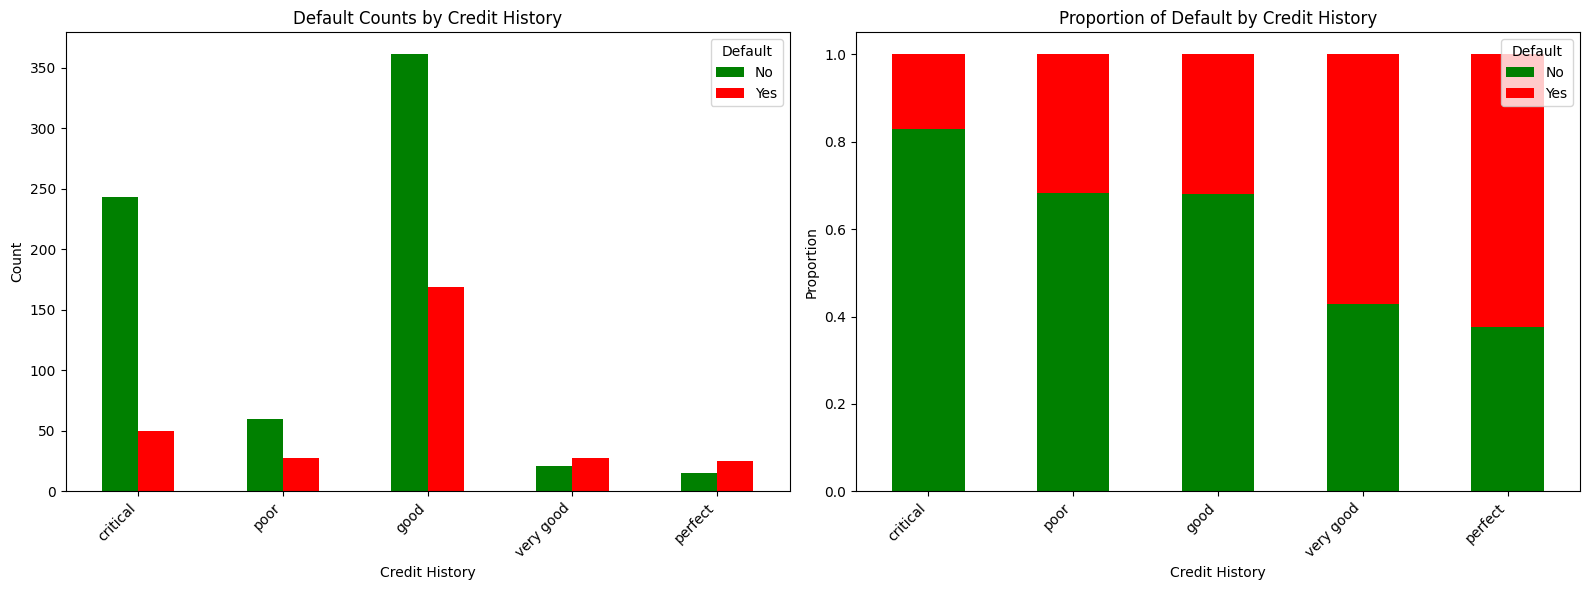

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order for 'credit_history'
credit_order = ['critical', 'poor', 'good', 'very good', 'perfect']

# Apply the custom order to the 'credit_history' column
non_numeric_data['credit_history'] = pd.Categorical(
    non_numeric_data['credit_history'],
    categories=credit_order,
    ordered=True
)

# Group by 'credit_history' and 'default', then count
grouped_counts = non_numeric_data.groupby(['credit_history', 'default']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Create subplots for raw counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Bar chart for raw counts
grouped_counts.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    ax=axes[0]
)
axes[0].set_title('Default Counts by Credit History')
axes[0].set_xlabel('Credit History')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Bar chart for proportions
proportions.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    ax=axes[1]
)
axes[1].set_title('Proportion of Default by Credit History')
axes[1].set_xlabel('Credit History')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
axes[1].legend(title='Default', labels=['No', 'Yes'])

# Adjust layout and display
plt.tight_layout()
plt.show()


# **Default by Employment Duration**

In [24]:
import pandas as pd

# Define the custom order for 'employment_duration'
employment_order = ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']

# Apply the custom order to the 'employment_duration' column
non_numeric_data['employment_duration'] = pd.Categorical(
    non_numeric_data['employment_duration'],
    categories=employment_order,
    ordered=True
)

# Group by 'employment_duration' and 'default', then count
grouped_counts = non_numeric_data.groupby(['employment_duration', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by employment_duration:\n")
print(grouped_counts)


Counts of 'default' grouped by employment_duration:

default               no  yes
employment_duration          
unemployed            39   23
< 1 year             102   70
1 - 4 years          235  104
4 - 7 years          135   39
> 7 years            189   64


<ipython-input-24-4cb1f36527af>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['employment_duration', 'default']).size().unstack(fill_value=0)


<ipython-input-25-44aef5c1c39a>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['employment_duration', 'default']).size().unstack(fill_value=0)


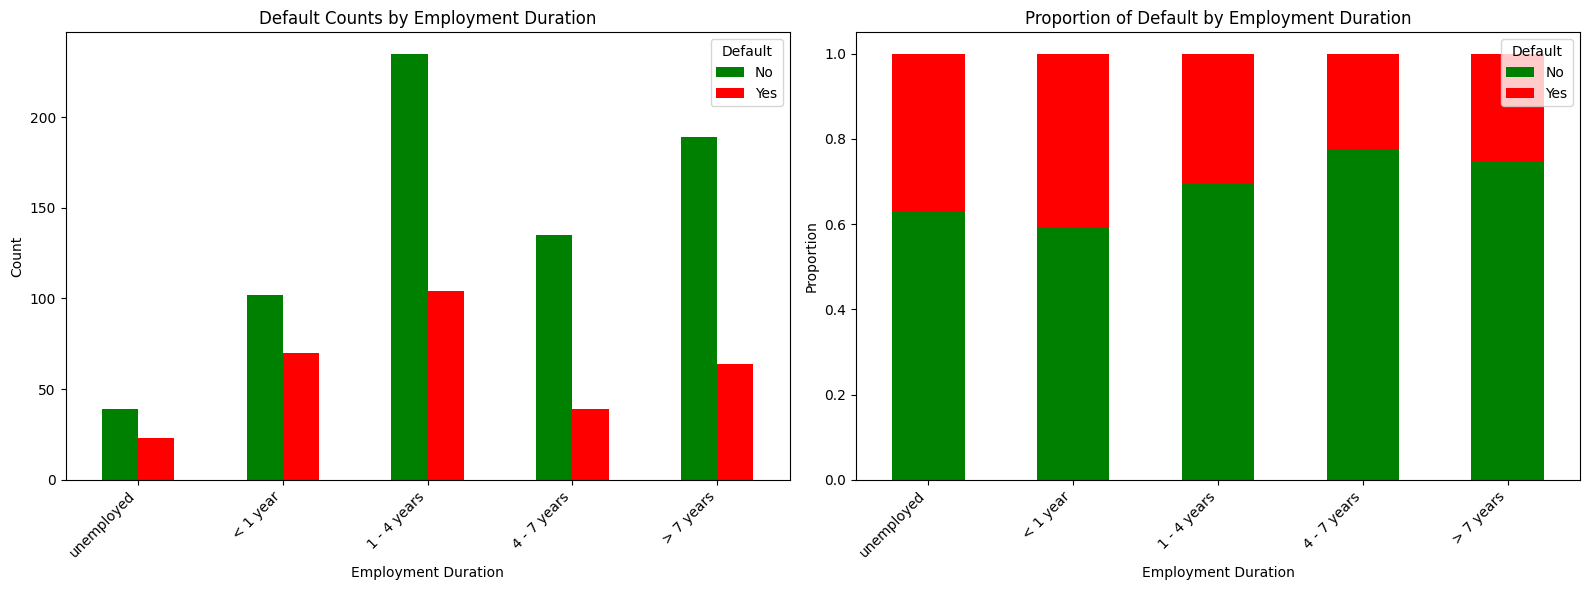

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order for 'employment_duration'
employment_order = ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']

# Apply the custom order to the 'employment_duration' column
non_numeric_data['employment_duration'] = pd.Categorical(
    non_numeric_data['employment_duration'],
    categories=employment_order,
    ordered=True
)

# Group by 'employment_duration' and 'default', then count
grouped_counts = non_numeric_data.groupby(['employment_duration', 'default']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Create subplots for raw counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Bar chart for raw counts
grouped_counts.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    ax=axes[0]
)
axes[0].set_title('Default Counts by Employment Duration')
axes[0].set_xlabel('Employment Duration')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Bar chart for proportions
proportions.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    ax=axes[1]
)
axes[1].set_title('Proportion of Default by Employment Duration')
axes[1].set_xlabel('Employment Duration')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
axes[1].legend(title='Default', labels=['No', 'Yes'])

# Adjust layout and display
plt.tight_layout()
plt.show()


# **Default by Housing Type**

In [26]:
import pandas as pd

# Define the custom order for 'housing'
housing_order = ['other', 'rent', 'own']

# Apply the custom order to the 'housing' column
non_numeric_data['housing'] = pd.Categorical(
    non_numeric_data['housing'],
    categories=housing_order,
    ordered=True
)

# Group by 'housing' and 'default', then count
grouped_counts = non_numeric_data.groupby(['housing', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by housing:\n")
print(grouped_counts)


Counts of 'default' grouped by housing:

default   no  yes
housing          
other     64   44
rent     109   70
own      527  186


<ipython-input-26-1fa65b5654f2>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['housing', 'default']).size().unstack(fill_value=0)


<ipython-input-27-5a10eb414962>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['housing', 'default']).size().unstack(fill_value=0)


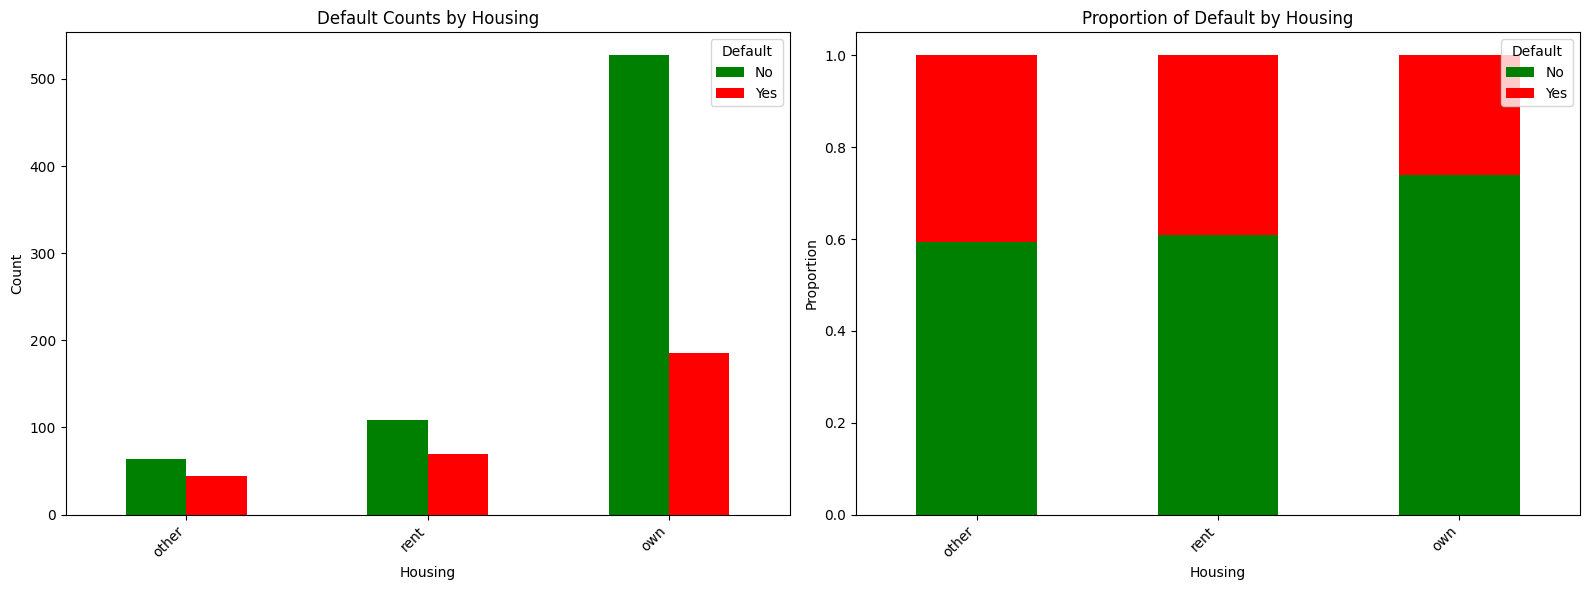

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order for 'housing'
housing_order = ['other', 'rent', 'own']

# Apply the custom order to the 'housing' column
non_numeric_data['housing'] = pd.Categorical(
    non_numeric_data['housing'],
    categories=housing_order,
    ordered=True
)

# Group by 'housing' and 'default', then count
grouped_counts = non_numeric_data.groupby(['housing', 'default']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Create subplots for raw counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Bar chart for raw counts
grouped_counts.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    ax=axes[0]
)
axes[0].set_title('Default Counts by Housing')
axes[0].set_xlabel('Housing')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Bar chart for proportions
proportions.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    ax=axes[1]
)
axes[1].set_title('Proportion of Default by Housing')
axes[1].set_xlabel('Housing')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
axes[1].legend(title='Default', labels=['No', 'Yes'])

# Adjust layout and display
plt.tight_layout()
plt.show()


# **Default by Loan Purpose**

In [28]:
import pandas as pd

# Replace 'car0' with 'car' in the 'purpose' column
non_numeric_data['purpose'] = non_numeric_data['purpose'].replace('car0', 'car')

# Define the custom order for 'purpose'
purpose_order = ['business', 'car', 'education', 'furniture/appliances', 'renovations']

# Apply the custom order to the 'purpose' column
non_numeric_data['purpose'] = pd.Categorical(
    non_numeric_data['purpose'],
    categories=purpose_order,
    ordered=True
)

# Group by 'purpose' and 'default', then count
grouped_counts = non_numeric_data.groupby(['purpose', 'default']).size().unstack(fill_value=0)

# Sort the index to ensure the custom order is reflected
grouped_counts = grouped_counts.sort_index()

# Display the counts
print("Counts of 'default' grouped by purpose:\n")
print(grouped_counts)


Counts of 'default' grouped by purpose:

default                no  yes
purpose                       
business               63   34
car                   238  111
education              36   23
furniture/appliances  349  124
renovations            14    8


<ipython-input-28-9ed54f843e0a>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['purpose', 'default']).size().unstack(fill_value=0)


<ipython-input-29-f61113c857f5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = non_numeric_data.groupby(['purpose', 'default']).size().unstack(fill_value=0)


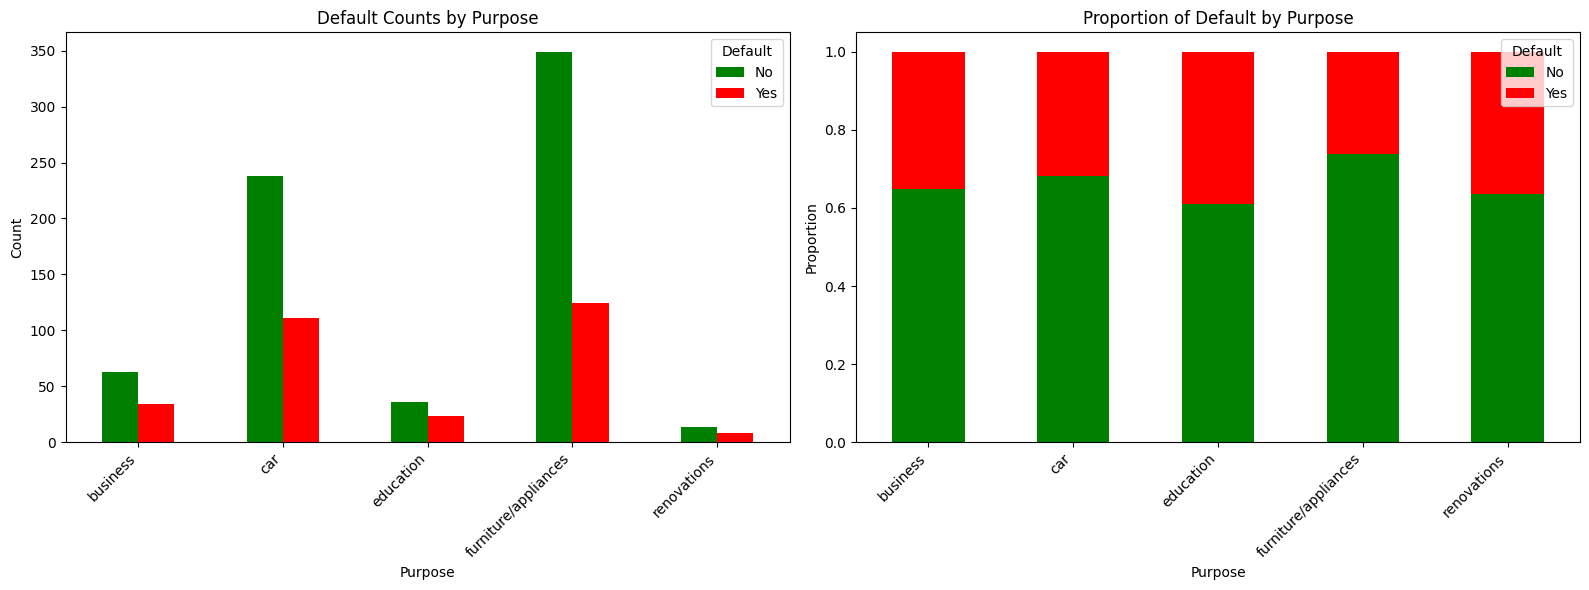

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'car0' with 'car' in the 'purpose' column
non_numeric_data['purpose'] = non_numeric_data['purpose'].replace('car0', 'car')

# Define the custom order for 'purpose'
purpose_order = ['business', 'car', 'education', 'furniture/appliances', 'renovations']

# Apply the custom order to the 'purpose' column
non_numeric_data['purpose'] = pd.Categorical(
    non_numeric_data['purpose'],
    categories=purpose_order,
    ordered=True
)

# Group by 'purpose' and 'default', then count
grouped_counts = non_numeric_data.groupby(['purpose', 'default']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

# Create subplots for raw counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Bar chart for raw counts
grouped_counts.plot(
    kind='bar',
    stacked=False,
    color=['green', 'red'],
    ax=axes[0]
)
axes[0].set_title('Default Counts by Purpose')
axes[0].set_xlabel('Purpose')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(grouped_counts.index, rotation=45, ha='right')
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Bar chart for proportions
proportions.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    ax=axes[1]
)
axes[1].set_title('Proportion of Default by Purpose')
axes[1].set_xlabel('Purpose')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(proportions.index, rotation=45, ha='right')
axes[1].legend(title='Default', labels=['No', 'Yes'])

# Adjust layout and display
plt.tight_layout()
plt.show()


# **Building the Logistic Regression**

# **Step 2: VIF Analysis**

In [30]:
# import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.astype(int)

# X set drops our target (dependent) variable
X = df_encoded.drop(columns=['default_yes'])

# Add constant for VIF calculation - this is the VIF's intercept
X_with_const = add_constant(X)

# Build VIF analysis
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display results
print(vif_data)

                            Feature         VIF
0                             const  127.104237
1              months_loan_duration    2.002368
2                            amount    2.427449
3                 percent_of_income    1.326848
4                years_at_residence    1.325949
5                               age    1.417273
6              existing_loans_count    1.630120
7                        dependents    1.107496
8           checking_balance_< 0 DM    1.632327
9         checking_balance_> 200 DM    1.223402
10         checking_balance_unknown    1.656248
11              credit_history_good    2.059791
12           credit_history_perfect    1.224264
13              credit_history_poor    1.305865
14         credit_history_very good    1.387739
15                      purpose_car    3.383364
16                     purpose_car0    1.207607
17                purpose_education    1.648538
18     purpose_furniture/appliances    3.565568
19              purpose_renovations    1

# **Step 3: Feature Engineering - Ranking Significance of Variables**

In [31]:

import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency

# Assuming data is already loaded
results = []

for col in data.columns:
    if col != 'default_yes':
        if np.issubdtype(data[col].dtype, np.number):  # Numeric columns
            corr, p_value = pointbiserialr(data['default_yes'], data[col])
            results.append((col, 'Numeric', corr, p_value))
        elif data[col].nunique() == 2:  # Binary categorical columns
            contingency_table = pd.crosstab(data['default_yes'], data[col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            results.append((col, 'Binary Categorical', chi2, p))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Feature', 'Type', 'Statistic', 'P-value'])

# Sort by significance (P-value) in ascending order
ranked_results = results_df.sort_values(by='P-value')

# Format the P-value as a decimal
ranked_results['P-value'] = ranked_results['P-value'].map('{:.6f}'.format)

# Display ranked results
print("\nRanked Results by Significance (P-value):")
print(ranked_results)



Ranked Results by Significance (P-value):
                            Feature     Type  Statistic   P-value
9          checking_balance_unknown  Numeric  -0.322436  0.000000
7           checking_balance_< 0 DM  Numeric   0.258333  0.000000
0              months_loan_duration  Numeric   0.214927  0.000000
20         savings_balance_< 100 DM  Numeric   0.161007  0.000000
1                            amount  Numeric   0.154739  0.000001
11           credit_history_perfect  Numeric   0.144767  0.000004
29                      housing_own  Numeric  -0.134589  0.000020
13         credit_history_very good  Numeric   0.134448  0.000020
22          savings_balance_unknown  Numeric  -0.129238  0.000042
27                other_credit_none  Numeric  -0.113285  0.000331
24     employment_duration_< 1 year  Numeric   0.106397  0.000752
30                     housing_rent  Numeric   0.092785  0.003316
4                               age  Numeric  -0.091127  0.003925
21        savings_balance_> 1000 

# **Step 4: Logistic Regression**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.linear_model as skl_lm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.metrics import r2_score

Logistic Regression

In [33]:
# List of features with p-value <= 0.05 from the previous analysis
significant_features = [
    'checking_balance_unknown', 'checking_balance_< 0 DM',
    'months_loan_duration', 'savings_balance_< 100 DM', 'amount',
    'credit_history_perfect', 'housing_own', 'credit_history_very good',
    'savings_balance_unknown', 'other_credit_none', 'employment_duration_< 1 year',
    'housing_rent', 'age', 'savings_balance_> 1000 DM', 'purpose_furniture/appliances',
    'employment_duration_4 - 7 years', 'percent_of_income',
    'savings_balance_500 - 1000 DM'
]

# Step 5: Prepare data for logistic regression
X = data[significant_features]  # Features
y = data['default_yes']  # Target variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Build the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Step 7: Print the summary of the logistic regression model
print(result.summary())

# Step 8: Make predictions and evaluate the model
# Predict probabilities and classify based on a cutoff of 0.5
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.492235
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            default_yes   No. Observations:                  700
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           18
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.1926
Time:                        20:43:29   Log-Likelihood:                -344.56
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.154e-25
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1048      0.748      0.140  

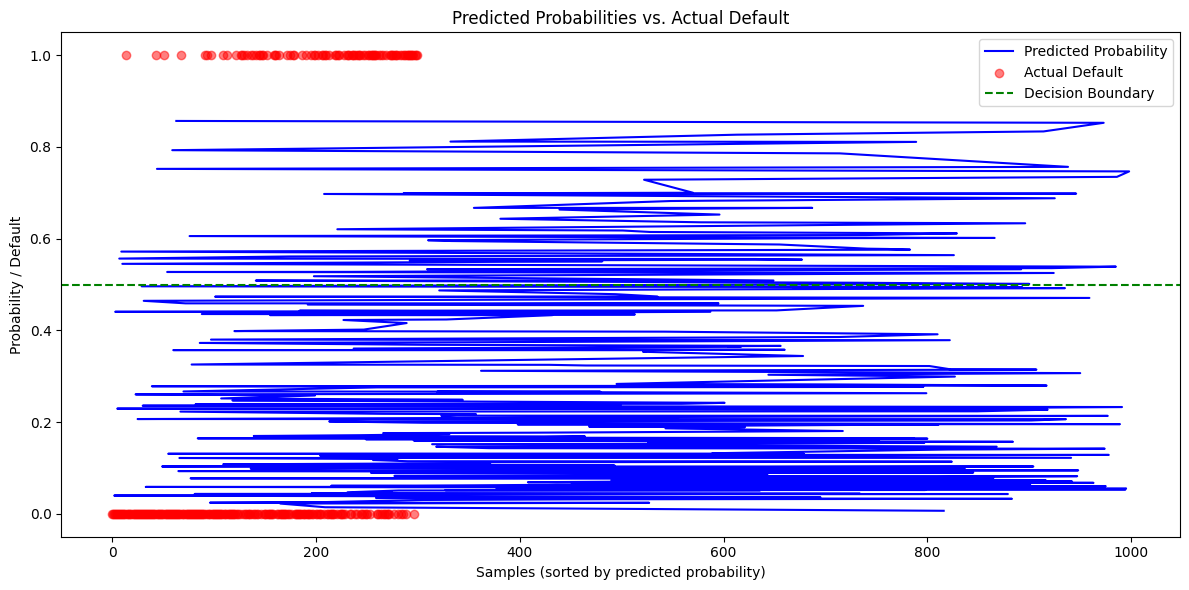

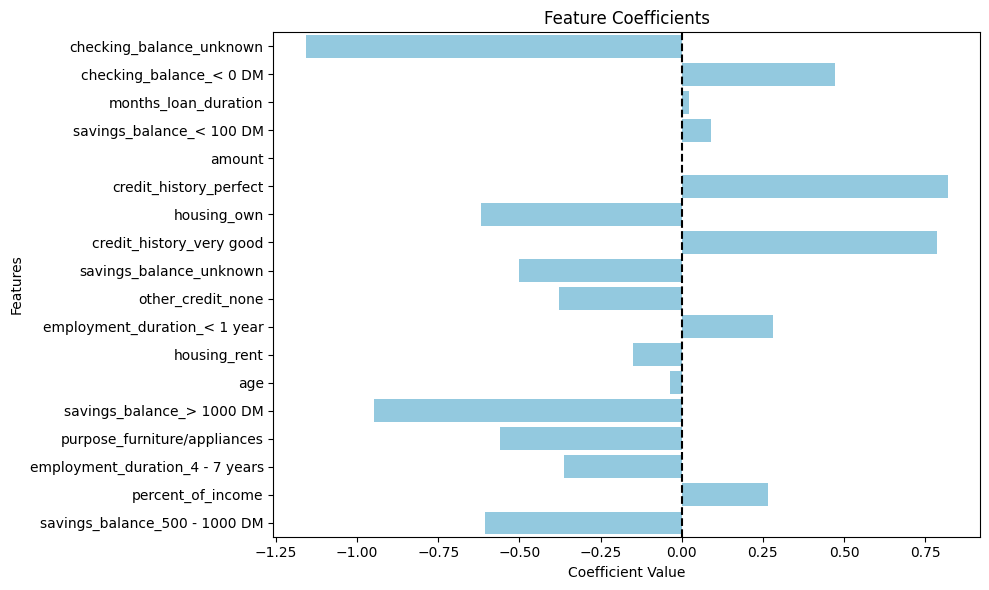

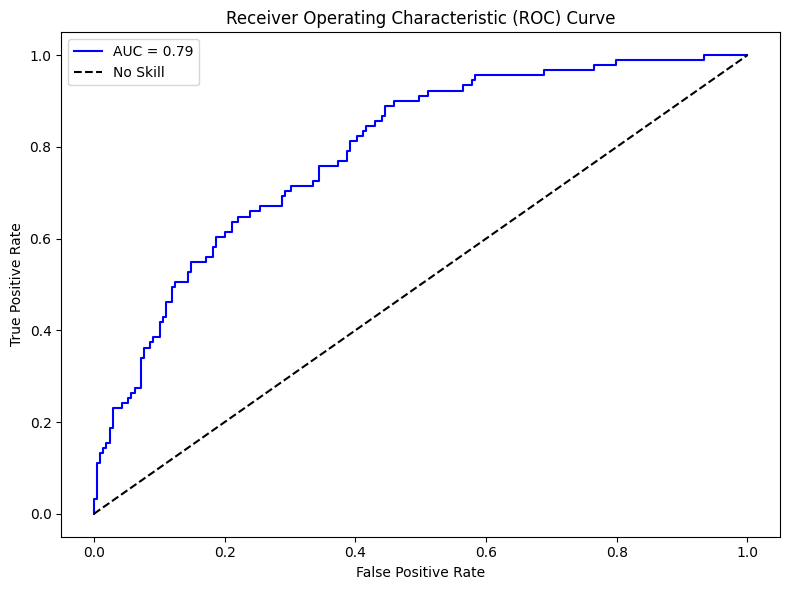

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Visualize Predicted Probabilities vs. Actual Default
# Sort test data by predicted probabilities for visualization
predicted_probs = result.predict(X_test)
sorted_indices = np.argsort(predicted_probs)
sorted_probs = predicted_probs.iloc[sorted_indices]
sorted_actuals = y_test.iloc[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(sorted_probs, label='Predicted Probability', color='blue')
plt.scatter(range(len(sorted_actuals)), sorted_actuals, color='red', alpha=0.5, label='Actual Default')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary')
plt.title('Predicted Probabilities vs. Actual Default')
plt.xlabel('Samples (sorted by predicted probability)')
plt.ylabel('Probability / Default')
plt.legend()
plt.tight_layout()
plt.show()

# Step 2: Coefficients of Features
# Extract and plot feature coefficients from the model
coefficients = result.params[1:]  # Exclude the constant
features = coefficients.index
coeff_values = coefficients.values

plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_values, y=features, color="skyblue")
plt.axvline(0, color='black', linestyle='--')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Step 3: ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
auc_score = roc_auc_score(y_test, predicted_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Skill')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-35-50dddf712848>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette="coolwarm")


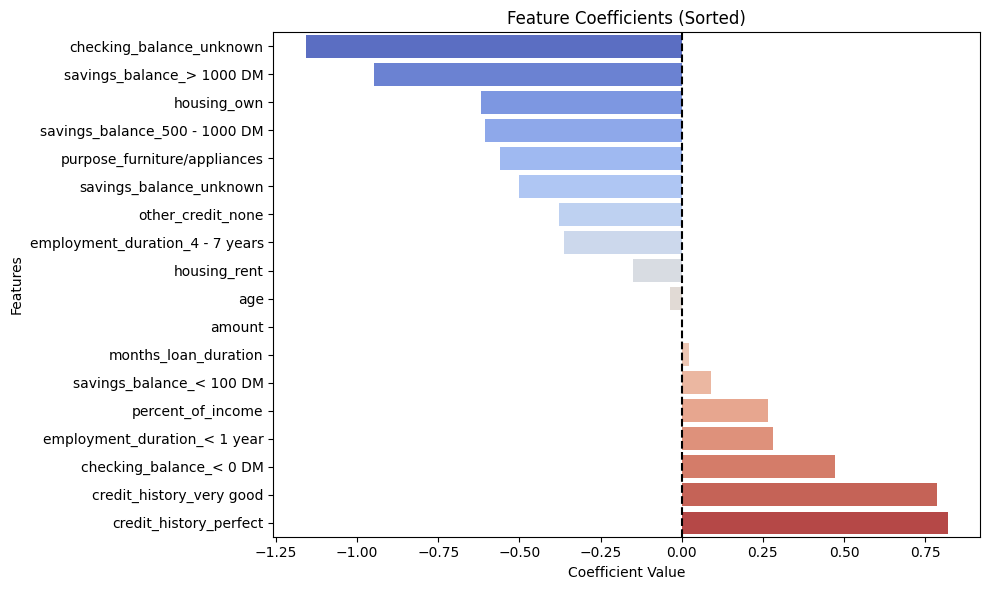

In [35]:
coefficients = result.params[1:]  # Exclude the constant
features = coefficients.index
coeff_values = coefficients.values

# Create a DataFrame for sorting
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_values})

# Sort the coefficients from most negative to most positive
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=True)

# Plot the sorted coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.title('Feature Coefficients (Sorted)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
